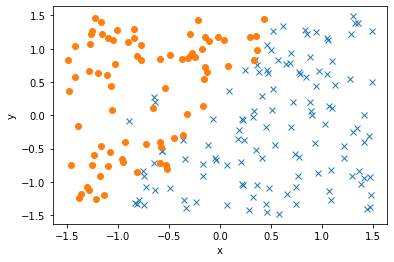

(2,)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [58]:
import numpy as np
import matplotlib.pyplot as plt


# J(w)
def cost_function(x, y, w):
#     wx = w.T*x
#     Y = -y*wx
    return np.sum(np.log(1 + np.exp(-y * (w[0]*x[:,0] + w[1]*x[:,1])))) + lam * w.T * w
# J(w)の微分
def gradient(x, y, w):
    logit = np.exp(-y*np.dot(w, x))
    return np.sum(-y*x*logit / (1 + logit)) + 2 * lam * w

# implement batch steepest gradient method
def batch_steepest_gradient(x,y,w0,eta0=0.01):
    w = w0
    eta = eta0
    min_w = None
    min_J = float("inf")
    iterations_with_no_improvement = 0
    
    #100回更新して改善しなければ終了
    while iterations_with_no_improvement < 100:
        value = cost_function(x,y,w)
        if value < min_J:
            min_w = w
            min_J = value
            iterations_with_no_improvement = 0
            eta = eta0
        else:
            iterations_with_no_improvement += 1
            eta *= 0.9
        
        w -= eta*gradient(x,y,w)
        W_history.append(w)
        loss_function.append(value)
    return min_w

# generate dataset
n = 200
x = 3 * (np.random.rand(n, 4) - 0.5)
y = (2 * x[:,0] - 1 * x[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y = 2 * y - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

lam = 0.01

# 重みの初期化
w0 = np.random.rand(2)
print(w0.shape)

# 記録用配列
W_history = []
loss_history = []

eta = 0.01
w = batch_steepest_gradient(x, y, w0, eta0=0.2)

In [49]:
x = np.array([[1,2,3],[1,2,3]])
print(x.shape)

(2, 3)
